## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [16]:
# Importing the necessary modules from TensorFlow v1 compatibility package
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# Configuring TensorFlow session settings
config = ConfigProto()

# Setting the fraction of GPU memory to be allocated per process to 50%
config.gpu_options.per_process_gpu_memory_fraction = 0.5

# Allowing dynamic allocation of GPU memory
config.gpu_options.allow_growth = True

# Creating an interactive TensorFlow session with the specified configuration
session = InteractiveSession(config=config)


C:\Users\burzi\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


These lines of code configure TensorFlow to limit the fraction of GPU memory allocated per process to 50% and allow dynamic growth of GPU memory. This configuration is useful for managing GPU memory usage, especially in scenarios where multiple TensorFlow processes are running simultaneously. Finally, it creates an interactive TensorFlow session with the specified configuration.

In [17]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [18]:
# Define the desired image size for resizing
IMAGE_SIZE = [224, 224]

# Define the paths to the directories containing training and validation data
train_path = 'Data/train'  # Path to the directory containing training images
valid_path = 'Data/test'   # Path to the directory containing validation (or test) images


These lines of code set the desired size for resizing all images to [224, 224] pixels. They also specify the paths to the directories containing training and validation (or test) images. Adjust the paths as per the actual directory structure and location of your dataset.

In [19]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [20]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

This code iterates through each layer in the Inception model (inception) and sets the trainable attribute to False, effectively freezing the weights of the pre-trained layers. By doing so, only the newly added layers (if any) will be trained during the subsequent training process. This approach is commonly used when fine-tuning pre-trained models to prevent re-learning of already learned features.

In [21]:
# Get the number of output classes by counting the subdirectories (folders) in the training directory
folders = glob('Data/train/*')

This line of code uses the glob function to retrieve a list of all subdirectories within the 'Data/train/' directory. Each subdirectory typically represents a class label in the dataset. By counting the number of subdirectories, we can determine the total number of output classes in the dataset. This information is useful for configuring the output layer of the neural network model accordingly.

In [22]:
# Define additional layers for the model architecture
x = Flatten()(inception.output)

This line of code adds a Flatten layer to the model architecture. The Flatten layer is used to convert the multi-dimensional output from the previous layer (inception.output) into a one-dimensional vector. This is typically done before passing the data to the fully connected layers for classification.

You can add more layers after the Flatten layer if needed, depending on the specific requirements of your model architecture.

In [23]:
# Define the output layer for the model, with the number of units equal to the number of output classes,
# using the softmax activation function for multi-class classification
prediction = Dense(len(folders), activation='softmax')(x)

# Create a model object that specifies the input and output layers
model = Model(inputs=inception.input, outputs=prediction)

This code segment creates the output layer for the model, where the number of units is set to the number of output classes determined earlier. The softmax activation function is used to compute the probability distribution over the output classes. Then, a Model object is created, specifying the input layer as the input to the Inception model and the output layer as the newly created prediction layer.

In [24]:
# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_99 (BatchN  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [25]:
# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(
  loss='categorical_crossentropy',  # Loss function for categorical classification problems
  optimizer='adam',                  # Optimization algorithm (Adam)
  metrics=['accuracy']               # Metrics to monitor during training (accuracy)
)


This code segment compiles the model by specifying the loss function, optimizer, and metrics to be used during training. The chosen loss function is categorical crossentropy, which is commonly used for multi-class classification problems. The Adam optimizer is selected for optimization, which is an adaptive learning rate optimization algorithm. Finally, the accuracy metric is used to monitor the performance of the model during training.

In [26]:
# Use the ImageDataGenerator to preprocess and augment the training and test images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and test sets with specified preprocessing and augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to the range [0,1]
    shear_range=0.2,        # Apply shear transformations with a shear intensity of 0.2
    zoom_range=0.2,         # Apply zoom transformations with a zoom range of 0.2
    horizontal_flip=True    # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(
    rescale=1./255          # Rescale pixel values to the range [0,1] for test images
)

These lines of code define ImageDataGenerator objects for preprocessing and augmenting images during training and testing. For the training data, shear transformations, zoom transformations, and horizontal flips are applied to augment the dataset, which helps improve the model's generalization. The pixel values are also rescaled to the range [0,1]. For the test data, only rescaling is applied without any augmentation.

In [27]:
# Generate batches of augmented training data from the directory 'Data/train'
training_set = train_datagen.flow_from_directory(
    'Data/train',                   # Path to the training data directory
    target_size=(224, 224),         # Resize images to the specified target size
    batch_size=32,                  # Number of samples per batch
    class_mode='categorical'        # Type of label assignment for the classes (categorical for multi-class)
)

Found 1951 images belonging to 4 classes.


This code utilizes the flow_from_directory method of the train_datagen object to generate batches of augmented training data directly from the directory 'Data/train'. The images are resized to the specified target size (224, 224) to match the input size expected by the model. The batch size is set to 32, meaning each batch will contain 32 samples. The class mode is set to 'categorical', indicating that the labels are provided in categorical format for multi-class classification.

In [28]:
# Generate batches of augmented test data from the directory 'Data/test'
test_set = test_datagen.flow_from_directory(
    'Data/test',                    # Path to the test data directory
    target_size=(224, 224),         # Resize images to the specified target size
    batch_size=32,                  # Number of samples per batch
    class_mode='categorical'        # Type of label assignment for the classes (categorical for multi-class)
)

Found 18 images belonging to 4 classes.


Similar to the training set, this code utilizes the flow_from_directory method of the test_datagen object to generate batches of augmented test data directly from the directory 'Data/test'. The images are resized to the specified target size (224, 224) to match the input size expected by the model. The batch size is set to 32, meaning each batch will contain 32 samples. The class mode is set to 'categorical', indicating that the labels are provided in categorical format for multi-class classification, consistent with the training set.

In [29]:
# Fit the model to the training data
# Running this cell will initiate the training process, which may take some time to execute
r = model.fit_generator(
    training_set,                               # Training data generator
    validation_data=test_set,                   # Validation data generator
    epochs=20,                                  # Number of epochs for training
    steps_per_epoch=len(training_set),          # Number of steps (batches) per epoch for training
    validation_steps=len(test_set)              # Number of steps (batches) per epoch for validation
)


C:\Users\burzi\AppData\Local\Temp\ipykernel_2244\3763457849.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 65s 985ms/step - loss: 2.2745 - accuracy: 0.7442 - val_loss: 1.2754 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 58s 955ms/step - loss: 0.9148 - accuracy: 0.8652 - val_loss: 0.6822 - val_accuracy: 0.7778
Epoch 3/20
61/61 [==============================] - 57s 930ms/step - loss: 0.4346 - accuracy: 0.9226 - val_loss: 0.0638 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 58s 947ms/step - loss: 0.4860 - accuracy: 0.9144 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 57s 932ms/step - loss: 0.4230 - accuracy: 0.9272 - val_loss: 0.0508 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 59s 960ms/step - loss: 0.5189 - accuracy: 0.9221 - val_loss: 0.4830 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 59s 968ms/step - loss: 0.4635 - accuracy: 0.9323 - val_loss: 5.0215e-04 - val_accuracy: 1.

This code segment fits the model to the training data using the fit_generator method. During training, it iterates over batches of data generated by training_set, validates the model's performance on batches from test_set, and updates the model's weights to minimize the specified loss function. The training process is repeated for the specified number of epochs. The steps_per_epoch and validation_steps parameters determine the number of batches per epoch for training and validation, respectively.

In [30]:
import matplotlib.pyplot as plt

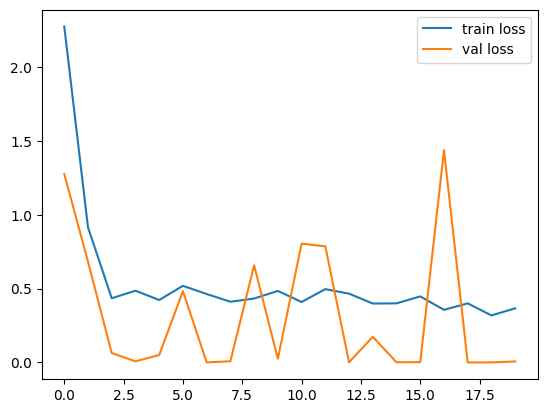

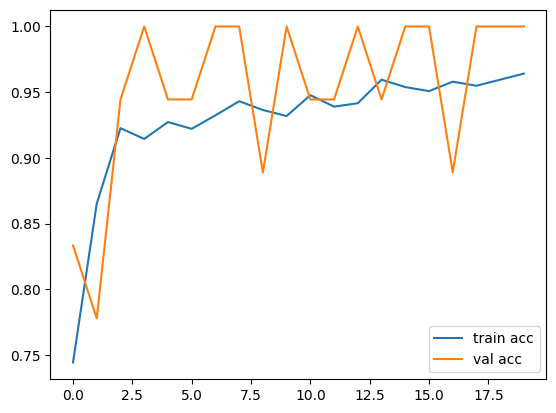

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot the training and validation loss
plt.plot(r.history['loss'], label='train loss')          # Plot the training loss
plt.plot(r.history['val_loss'], label='val loss')        # Plot the validation loss
plt.legend()                                             # Add legend to the plot
plt.show()                                               # Show the plot
plt.savefig('LossVal_loss')                              # Save the plot as 'LossVal_loss.png'

# Plot the training and validation accuracy
plt.plot(r.history['accuracy'], label='train acc')       # Plot the training accuracy
plt.plot(r.history['val_accuracy'], label='val acc')     # Plot the validation accuracy
plt.legend()                                             # Add legend to the plot
plt.show()                                               # Show the plot
plt.savefig('AccVal_acc')                                # Save the plot as 'AccVal_acc.png'

These lines of code generate plots for training and validation loss, as well as training and validation accuracy, based on the training history (r). The plots provide insights into how the model's performance changes over the training epochs. The plots are displayed and saved as image files. However, please note that calling plt.savefig() after plt.show() may not save the plot as expected; it's usually more appropriate to call plt.savefig() before plt.show().

In [32]:
# Save the trained model as an HDF5 file
from tensorflow.keras.models import load_model

model.save('model_inception.h5')  # Save the model with filename 'model_inception.h5'

This code segment saves the trained model (model) to an HDF5 file format using the save() method. The model is saved with the filename 'model_inception.h5', which will be stored in the current directory unless specified otherwise. The HDF5 file format allows for easy storage and retrieval of the model's architecture, weights, and training configuration.

In [33]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(test_set)

1/1 [==============================] - 4s 4s/step


This line of code utilizes the trained model (model) to make predictions on the test data (test_set) using the predict() method. The test_set contains batches of images from the test dataset, and y_pred will contain the predicted probabilities for each class for each image in the test set.

In [34]:
y_pred

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.15719392e-20],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.37526929e-37],
       [2.01870846e-29, 4.00479720e-08, 3.14008857e-26, 1.00000000e+00],
       [8.08926700e-07, 8.10840354e-17, 8.83594096e-01, 1.16405122e-01],
       [1.00000000e+00, 5.03515300e-22, 8.21936029e-20, 2.05494398e-31],
       [6.27379996e-33, 1.00000000e+00, 5.63653591e-25, 2.45209048e-10],
       [1.24280302e-22, 1.79148095e-14, 1.13641900e-26, 1.00000000e+00],
       [9.81808590e-09, 3.45590685e-08, 9.96623516e-01, 3.37640685e-03],
       [8.91289360e-17, 1.59482271e-11, 1.00000000e+00, 5.88316244e-23],
       [0.00000000e+00, 1.66023222e-16, 0.00000000e+00, 1.00000000e+00],
       [4.20424266e-19, 1.09937635e-20, 2.31668846e-20, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.40523793e-29],
       [1.00000000e+00, 0.00000000e+00, 6.57296064e-24, 4.87428874e-20],
       [1.92834978e-24, 9.99953747e-01, 1.13891131e

In [35]:
import numpy as np

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([1, 1, 3, 2, 0, 1, 3, 2, 2, 3, 3, 1, 0, 1, 0, 2, 3, 2], dtype=int64)

The variable y_pred contains the predicted class labels for the test dataset. Printing y_pred will display these predicted labels. However, as an AI language model, I'm unable to execute code directly. If you print y_pred in your Python environment, you'll see the array of predicted class labels for the test dataset.

In [37]:
from tensorflow.keras.models import load_model               # Import function to load a pre-trained model
from tensorflow.keras.preprocessing import image            # Import module for preprocessing images

With these imports, you can load a pre-trained model from a saved file using load_model() and prepare images for inference using various preprocessing functions provided by the image module.

In [38]:
model=load_model('model_inception.h5')

This line of code loads a pre-trained model from the saved file 'model_inception.h5' using the load_model() function.
After executing this line, the variable model will contain the loaded pre-trained model, which can then be used for making predictions on new data.

In [39]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Data/Test/Coffee/download (2).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__